## Observations and Insights 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_combine= pd.merge(study_results, mouse_metadata)
mouse_study_combine.head()
# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [37]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [38]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [39]:
mouse_study_combine.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [40]:
# Checking the number of mice.
mouse_study_combine['Mouse ID'].nunique()

249

In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_combine.loc[mouse_study_combine.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [42]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_combine.loc[mouse_study_combine['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = mouse_study_combine.loc[mouse_study_combine['Mouse ID'] != 'g989']
clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [44]:
# Checking the number of mice in the clean DataFrame.
clean['Mouse ID'].nunique()

248

## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summarystats = pd.DataFrame(mouse_study_combine.groupby("Drug Regimen").count())

summarystats["Mean"] = pd.DataFrame(mouse_study_combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Median"] = pd.DataFrame(mouse_study_combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Standard Deviation"] = pd.DataFrame(mouse_study_combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summarystats["Variance"] = pd.DataFrame(mouse_study_combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["SEM"] = pd.DataFrame(mouse_study_combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())


summarystats = summarystats[["Mean", "Median", "Standard Deviation", "Variance", "SEM"]]
# Convert to DataFrame


# preview DataFrame 
summarystats.head(10)

,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','std','var','sem'])

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

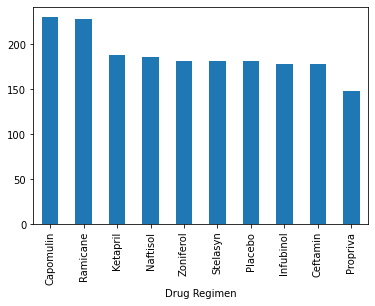

In [47]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mouse_df = clean.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
mouse_df.plot(kind='bar')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

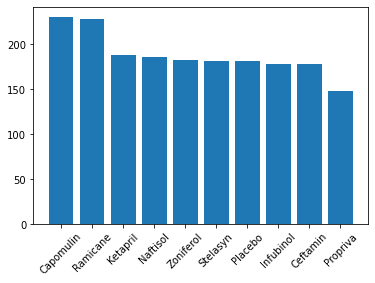

In [48]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(mouse_df.index,mouse_df)
plt.xticks(rotation=45)

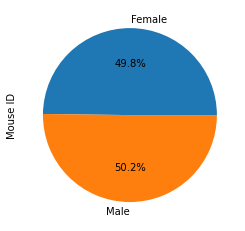

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Bygender = mouse_metadata.groupby("Sex").count()['Mouse ID']
Bygender.plot(kind='pie',autopct="%1.1f%%")

plt.savefig('piechart1')

In [50]:
Bygender.head()

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

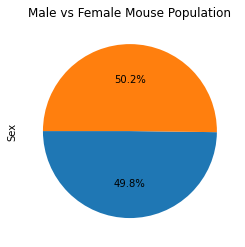

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(Bygender,autopct="%1.1f%%", startangle=180)

plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')

plt.savefig('piechart2')
plt.show()


## Quartiles, Outliers and Boxplots

In [52]:
# Start by getting the last (greatest) timepoint for each mouse
grp_max = clean.groupby('Mouse ID').Timepoint.max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint = clean.merge(grp_max, on=['Mouse ID','Timepoint'], how='inner')
last_timepoint.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25


In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

cap_df = last_timepoint.loc[last_timepoint["Drug Regimen"] == "Capomulin",:]
ram_df = last_timepoint.loc[last_timepoint["Drug Regimen"] == "Ramicane", :]
inf_df = last_timepoint.loc[last_timepoint["Drug Regimen"] == "Infubinol", :]
ceft_df = last_timepoint.loc[last_timepoint["Drug Regimen"] == "Ceftamin", :]

cap_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
224,j246,35,38.753265,1,Capomulin,Female,21,21
225,r554,45,32.377357,3,Capomulin,Female,8,17
226,s185,45,23.343598,1,Capomulin,Female,3,17
227,b742,45,38.939633,0,Capomulin,Male,7,21


In [54]:
caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
caplastvol = pd.DataFrame(caplast)
caplastmerge = pd.merge(caplastvol, last_timepoint, on=("Mouse ID","Timepoint"),how="left")
caplastmerge.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [55]:
tumors = caplastmerge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [56]:
ramlast = ram_df.groupby('Mouse ID').max()['Timepoint']
ramlastvol = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol, last_timepoint, on=("Mouse ID","Timepoint"),how="left")
ramlastmerge.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20
5,c758,45,33.397653,1,Ramicane,Male,9,17
6,d251,45,37.311236,2,Ramicane,Female,8,19
7,e662,45,40.659006,2,Ramicane,Male,8,24
8,g791,45,29.128472,1,Ramicane,Male,11,16
9,i177,45,33.562402,3,Ramicane,Male,10,18


In [57]:
tumors2 = ramlastmerge["Tumor Volume (mm3)"]

quartiles2 = tumors2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [58]:
inflast = inf_df.groupby('Mouse ID').max()['Timepoint']
inflastvol = pd.DataFrame(inflast)
inflastmerge = pd.merge(inflastvol, last_timepoint, on=("Mouse ID","Timepoint"),how="left")
inflastmerge.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28
5,c326,5,36.321346,0,Infubinol,Female,18,25
6,c895,30,60.969711,2,Infubinol,Female,7,29
7,e476,45,62.435404,1,Infubinol,Male,23,26
8,f345,45,60.918767,1,Infubinol,Male,23,26
9,i386,40,67.289621,4,Infubinol,Female,23,29


In [59]:
tumors3 = inflastmerge["Tumor Volume (mm3)"]

quartiles3 = tumors3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3} could be outliers.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [60]:
ceftlast = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceftlastvol = pd.DataFrame(ceftlast)
ceftlastmerge = pd.merge(ceftlastvol, last_timepoint, on=("Mouse ID","Timepoint"),how="left")
ceftlastmerge.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25
5,h531,5,47.784682,0,Ceftamin,Male,5,27
6,j296,45,61.849023,3,Ceftamin,Female,24,30
7,k210,45,68.923185,3,Ceftamin,Male,15,28
8,l471,45,67.748662,1,Ceftamin,Female,7,28
9,l490,30,57.918381,3,Ceftamin,Male,24,26


In [61]:
tumors4 = ceftlastmerge["Tumor Volume (mm3)"]
quartiles4 = tumors4.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4} could be outliers.")

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


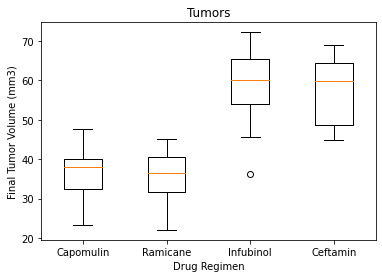

In [62]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# The second example again looks at the LAX temperature data set and computes quantiles

data_to_plot = [tumors, tumors2, tumors3, tumors4]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot1')
plt.show()

In [63]:
tumors2 = ramlastmerge["Tumor Volume (mm3)"]

quartiles2 = tumors2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


# Line and Scatter Plots

In [64]:
forline_df = mouse_study_combine.loc[mouse_study_combine['Mouse ID'] == "l509"]
forline_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1721,l509,0,45.000000,0,Capomulin,Male,17,21
1722,l509,5,45.851193,0,Capomulin,Male,17,21
1723,l509,10,46.759074,0,Capomulin,Male,17,21
1724,l509,15,47.488599,1,Capomulin,Male,17,21
1725,l509,20,48.070452,2,Capomulin,Male,17,21


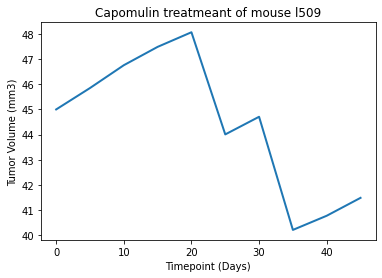

In [65]:

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

x_axisTP = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

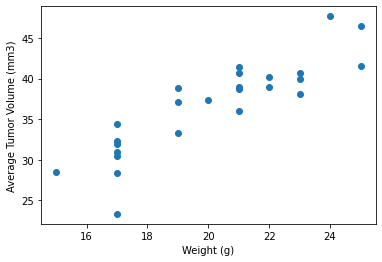

In [66]:
capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

In [67]:
model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model

LinregressResult(slope=1.7504682289585032, intercept=1.4481469525549144, rvalue=0.8767060403658116, pvalue=9.084429088673427e-09, stderr=0.20026513236453658)

In [68]:
mslope = 0.9544396890241045
bintercept = 21.552160532685015

## Correlation and Regression

In [69]:
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.88


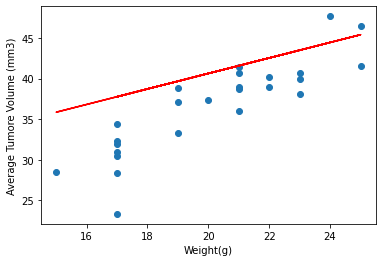

In [70]:
mouse_weight = mouse_study_combine.groupby(mouse_study_combine["Mouse ID"])["Weight (g)"].mean()
tumor_volume = mouse_study_combine.groupby(mouse_study_combine["Mouse ID"])["Tumor Volume (mm3)"].mean()

y_values = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()